# Funciones de utilidad

In [ ]:
#Extras
def jump():
  print("-" * 80, "\n" * 4)

## Leer el archivo

In [ ]:
import pandas as pd

nombre_archivo = '/content/train.csv'

#Lee un archivo CSV y devuelve un DataFrame de pandas
try:
    df = pd.read_csv(nombre_archivo)
except FileNotFoundError:
    raise FileNotFoundError(f"Error: El archivo '{nombre_archivo}' no se encontró.")
except pd.errors.ParserError:
    raise pd.errors.ParserError(f"Error: No se pudo analizar el archivo '{nombre_archivo}'. Verifica que sea un archivo CSV válido.")
except Exception as e:
    raise Exception(f"Error inesperado al leer el archivo: {e}")

In [ ]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Valores nulos

In [ ]:
# Analizar los valores nulos
nulos = df.isnull().sum()
print(nulos[nulos > 0])  # muestra columnas con valores nulos
print(f"\nPorcentaje de valores nulos en el dataset: {df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100:.2f}%")

ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_TIENELAVADORA                39773
FAMI_TIENEAUTOMOVIL               43623
ESTU_PAGOMATRICULAPROPIO           6498
FAMI_TIENECOMPUTADOR              38103
FAMI_TIENEINTERNET.1              26629
FAMI_EDUCACIONMADRE               23664
dtype: int64

Porcentaje de valores nulos en el dataset: 2.04%


In [ ]:
# Análisis de columnas categóricas
columnas_categoricas = df.select_dtypes(include=['object']).columns
print("Columnas categóricas:")
for col in list(columnas_categoricas):
    print(col)

Columnas categóricas:
ESTU_PRGM_ACADEMICO
ESTU_PRGM_DEPARTAMENTO
ESTU_VALORMATRICULAUNIVERSIDAD
ESTU_HORASSEMANATRABAJA
FAMI_ESTRATOVIVIENDA
FAMI_TIENEINTERNET
FAMI_EDUCACIONPADRE
FAMI_TIENELAVADORA
FAMI_TIENEAUTOMOVIL
ESTU_PRIVADO_LIBERTAD
ESTU_PAGOMATRICULAPROPIO
FAMI_TIENECOMPUTADOR
FAMI_TIENEINTERNET.1
FAMI_EDUCACIONMADRE
RENDIMIENTO_GLOBAL


## Analisis de columnas numericas

Columnas numéricas: ['ID', 'PERIODO', 'coef_1', 'coef_2', 'coef_3', 'coef_4']


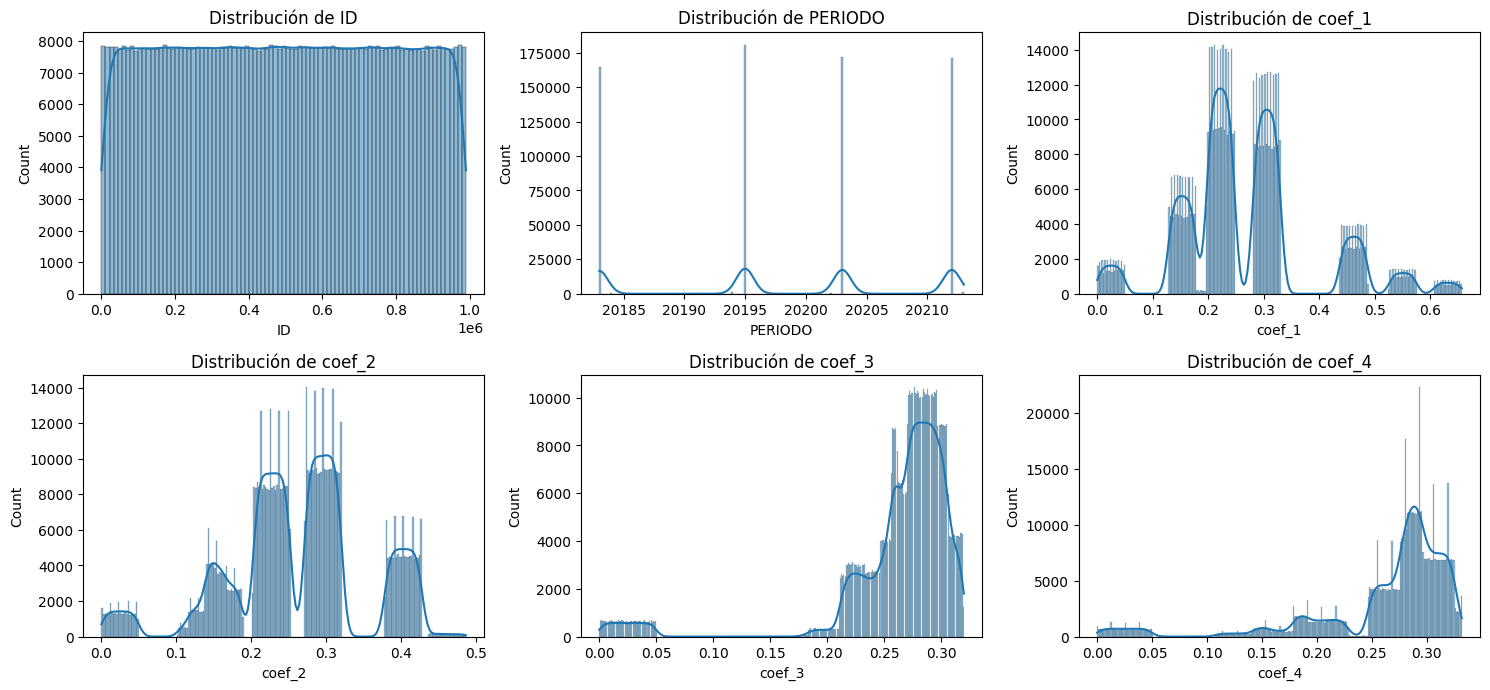

In [ ]:
# Análisis de columnas numéricas
columnas_numericas = df.select_dtypes(include=['number']).columns
print(f"Columnas numéricas: {list(columnas_numericas)}")

# Histogramas de columnas numéricas
plt.figure(figsize=(15, 10))
for i, col in enumerate(columnas_numericas[:min(9, len(columnas_numericas))]):  # Limitar a 9 columnas para visualización
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

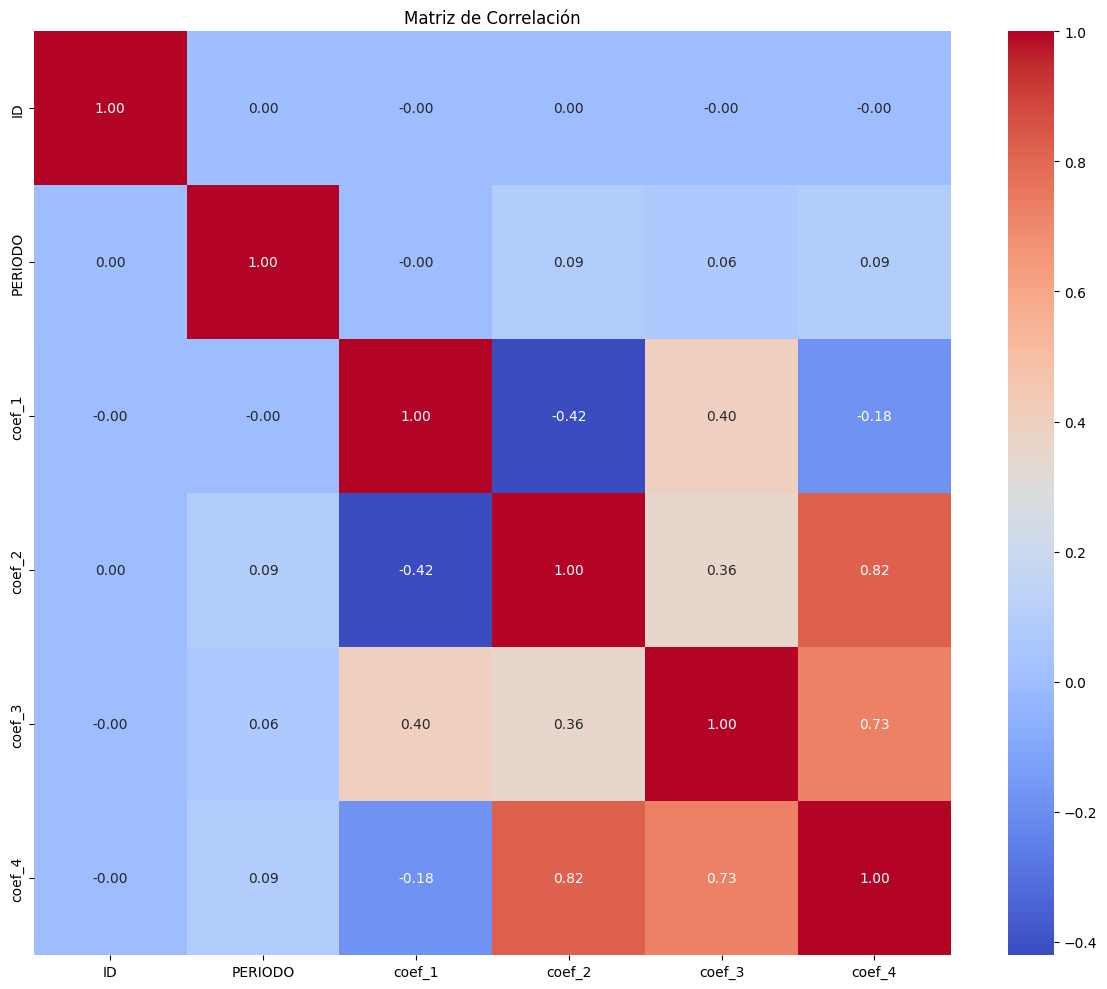

In [ ]:
# Matriz de correlación entre variables numéricas
plt.figure(figsize=(12, 10))
corr_matrix = df[columnas_numericas].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

## Separar las columnas por tipo

In [ ]:
# Columna objetivo (variable a predecir)
target_column = 'RENDIMIENTO_GLOBAL'

# Columnas a descartar (como ID, que no aporta valor predictivo)
columns_to_drop = ['ID']

# Columnas categóricas
cat_columns = [col for col in columnas_categoricas if col not in columns_to_drop + [target_column]]
print(f"Columnas categóricas para procesamiento: {cat_columns}")

# Columnas numéricas (excluyendo el objetivo y las que se descartan)
num_columns = [col for col in columnas_numericas if col not in columns_to_drop + [target_column]]
print(f"Columnas numéricas para procesamiento: {num_columns}")

Columnas categóricas para procesamiento: ['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE']
Columnas numéricas para procesamiento: ['PERIODO', 'coef_1', 'coef_2', 'coef_3', 'coef_4']


## Manejo de valores nulos

In [ ]:
# Hacer una copia del dataframe original para no modificarlo
df_processed = df.copy()

# Imputar valores nulos en columnas numéricas con la mediana
for col in num_columns:
    if df_processed[col].isnull().sum() > 0:
        median_value = df_processed[col].median()
        df_processed[col].fillna(median_value, inplace=True)
        print(f"Imputados {df[col].isnull().sum()} valores nulos en '{col}' con la mediana: {median_value}")

# Imputar valores nulos en columnas categóricas con la moda
for col in cat_columns:
    if df_processed[col].isnull().sum() > 0:
        mode_value = df_processed[col].mode()[0]
        df_processed[col].fillna(mode_value, inplace=True)
        print(f"Imputados {df[col].isnull().sum()} valores nulos en '{col}' con la moda: {mode_value}")

<ipython-input-16-6ef72e668ecf>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed[col].fillna(mode_value, inplace=True)


Imputados 6287 valores nulos en 'ESTU_VALORMATRICULAUNIVERSIDAD' con la moda: Entre 1 millón y menos de 2.5 millones
Imputados 30857 valores nulos en 'ESTU_HORASSEMANATRABAJA' con la moda: Más de 30 horas
Imputados 32137 valores nulos en 'FAMI_ESTRATOVIVIENDA' con la moda: Estrato 2
Imputados 26629 valores nulos en 'FAMI_TIENEINTERNET' con la moda: Si
Imputados 23178 valores nulos en 'FAMI_EDUCACIONPADRE' con la moda: Secundaria (Bachillerato) completa
Imputados 39773 valores nulos en 'FAMI_TIENELAVADORA' con la moda: Si
Imputados 43623 valores nulos en 'FAMI_TIENEAUTOMOVIL' con la moda: No
Imputados 6498 valores nulos en 'ESTU_PAGOMATRICULAPROPIO' con la moda: No
Imputados 38103 valores nulos en 'FAMI_TIENECOMPUTADOR' con la moda: Si
Imputados 26629 valores nulos en 'FAMI_TIENEINTERNET.1' con la moda: Si
Imputados 23664 valores nulos en 'FAMI_EDUCACIONMADRE' con la moda: Secundaria (Bachillerato) completa


## Codificar variables categoricas

In [ ]:
# Codificación de variables categóricas

# One-hot encoding para variables categóricas
print("Aplicando One-Hot Encoding a columnas categóricas...")
df_encoded = pd.get_dummies(df_processed, columns=cat_columns, drop_first=True)
print(f"Dimensiones después de codificación: {df_encoded.shape[0]} filas x {df_encoded.shape[1]} columnas")
print(f"Nuevas columnas creadas: {df_encoded.shape[1] - df_processed.shape[1]}")

Aplicando One-Hot Encoding a columnas categóricas...
Dimensiones después de codificación: 692500 filas x 1030 columnas
Nuevas columnas creadas: 1009


## Normalizacion de variables numericas

In [ ]:
# Normalización de variables numéricas

# Normalizar variables numéricas con StandardScaler
scaler = StandardScaler()
df_encoded[num_columns] = scaler.fit_transform(df_encoded[num_columns])
print(f"Columnas normalizadas: {num_columns}")

Columnas normalizadas: ['PERIODO', 'coef_1', 'coef_2', 'coef_3', 'coef_4']


## Estado final de DataFrame

In [ ]:
# Verificar el estado final del dataframe
print(f"Dimensiones finales: {df_encoded.shape[0]} filas x {df_encoded.shape[1]} columnas")
print("Primeras 5 filas del dataset procesado:")
print(df_encoded.head())

Dimensiones finales: 692500 filas x 1030 columnas
Primeras 5 filas del dataset procesado:
       ID   PERIODO RENDIMIENTO_GLOBAL    coef_1    coef_2    coef_3  \
0  904256  1.294094         medio-alto  0.437002 -0.556223  0.813978   
1  645256  1.294094               bajo  0.346934 -0.481341  0.508180   
2  308367  0.439801               bajo  0.232301 -0.492038  0.729034   
3  470353 -0.319570               alto  1.771650 -0.941332 -0.171371   
4  989032  1.294094         medio-bajo  0.387874 -0.299484  0.389259   

     coef_4  ESTU_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE  \
0  0.060296                                           False   
1  0.016142                                           False   
2  0.016142                                           False   
3 -1.072993                                           False   
4  0.457683                                           False   

   ESTU_PRGM_ACADEMICO_ACUICULTURA  ESTU_PRGM_ACADEMICO_ADMINISTRACION  ...  \
0                  

In [ ]:
# Verificar si hay valores nulos pendientes
nulos_finales = df_encoded.isnull().sum().sum()
print(f"\nValores nulos pendientes: {nulos_finales}")


Valores nulos pendientes: 0


In [ ]:
# Guardar el dataset procesado
df_encoded.to_csv('train_preprocessed.csv', index=False)
print("Dataset procesado guardado como 'train_preprocessed.csv'")

Dataset procesado guardado como 'train_preprocessed.csv'
